<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Partial-fourier-reconstruction" data-toc-modified-id="Partial-fourier-reconstruction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Partial fourier reconstruction</a></span><ul class="toc-item"><li><span><a href="#Phantom" data-toc-modified-id="Phantom-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Phantom</a></span><ul class="toc-item"><li><span><a href="#Applying-a-Phase-to-a-Real-Image" data-toc-modified-id="Applying-a-Phase-to-a-Real-Image-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Applying a Phase to a Real Image</a></span></li><li><span><a href="#Selecting-a-Single-Slice" data-toc-modified-id="Selecting-a-Single-Slice-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Selecting a Single Slice</a></span></li></ul></li><li><span><a href="#Sample-Data-and-Generate-a-Low-Resolution-Phase-Estimate" data-toc-modified-id="Sample-Data-and-Generate-a-Low-Resolution-Phase-Estimate-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sample Data and Generate a Low-Resolution Phase Estimate</a></span><ul class="toc-item"><li><span><a href="#K-Space-of-Phased-Image,-M1_Phased" data-toc-modified-id="K-Space-of-Phased-Image,-M1_Phased-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>K-Space of Phased Image, M1_Phased</a></span></li><li><span><a href="#3-Quarters-Partial-Fourier-Sampling" data-toc-modified-id="3-Quarters-Partial-Fourier-Sampling-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>3 Quarters Partial Fourier Sampling</a></span></li></ul></li><li><span><a href="#Low-resolution-phase-estimate-from-central-k-space" data-toc-modified-id="Low-resolution-phase-estimate-from-central-k-space-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Low resolution phase estimate from central k-space</a></span><ul class="toc-item"><li><span><a href="#Hanning-Function" data-toc-modified-id="Hanning-Function-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Hanning Function</a></span></li><li><span><a href="#Low-Resolution-Phase-Estimate" data-toc-modified-id="Low-Resolution-Phase-Estimate-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Low Resolution Phase Estimate</a></span></li></ul></li></ul></li></ul></div>

# Partial fourier reconstruction

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Partial-fourier-reconstruction" data-toc-modified-id="Partial-fourier-reconstruction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Partial fourier reconstruction</a></span><ul class="toc-item"><li><span><a href="#Phantom" data-toc-modified-id="Phantom-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Phantom</a></span><ul class="toc-item"><li><span><a href="#Applying-a-Phase-to-a-Real-Image" data-toc-modified-id="Applying-a-Phase-to-a-Real-Image-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Applying a Phase to a Real Image</a></span></li><li><span><a href="#Selecting-a-Single-Slice" data-toc-modified-id="Selecting-a-Single-Slice-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Selecting a Single Slice</a></span></li></ul></li><li><span><a href="#Sample-Data-and-Generate-a-Low-Resolution-Phase-Estimate" data-toc-modified-id="Sample-Data-and-Generate-a-Low-Resolution-Phase-Estimate-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sample Data and Generate a Low-Resolution Phase Estimate</a></span><ul class="toc-item"><li><span><a href="#K-Space-of-Phased-Image,-M1_Phased" data-toc-modified-id="K-Space-of-Phased-Image,-M1_Phased-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>K-Space of Phased Image, M1_Phased</a></span></li><li><span><a href="#3-Quarters-Partial-Fourier-Sampling" data-toc-modified-id="3-Quarters-Partial-Fourier-Sampling-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>3 Quarters Partial Fourier Sampling</a></span></li></ul></li><li><span><a href="#Low-resolution-phase-estimate-from-central-k-space" data-toc-modified-id="Low-resolution-phase-estimate-from-central-k-space-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Low resolution phase estimate from central k-space</a></span><ul class="toc-item"><li><span><a href="#Hanning-Function" data-toc-modified-id="Hanning-Function-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Hanning Function</a></span></li><li><span><a href="#Low-Resolution-Phase-Estimate" data-toc-modified-id="Low-Resolution-Phase-Estimate-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Low Resolution Phase Estimate</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import BrukerMRI as bruker
import pylab as pl
import plot
#Python method of extracting raw Bruker Files
import BrukerMRI as bruker

# Modules
import pandas as pd
import pydicom as dcm
import math
import numpy as np
import matplotlib.pyplot as plt
import glob
from os.path import expanduser
import os
from matplotlib import cm
import cmath

In [2]:
from phantominator import shepp_logan
# MR phantom (returns proton density, T1, and T2 maps)
M0, T1, T2 = shepp_logan((128, 128,20), MR=True)

In [3]:
# Plot Style
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
COLOR = 'white'

def i_plots(i_spaces):
    key_list = list(i_spaces)
    plt.figure(figsize=(25,25))
     #plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    plt.rcParams['text.color'] = COLOR
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR

    for key,value in i_spaces.items():
        plt.subplot(((300+21+key_list.index(key))))
        plt.imshow((value[:,:]))
        plt.title('Image of ' + key)
        plt.colorbar()

Text(0.5, 1.0, 'T2 Image')

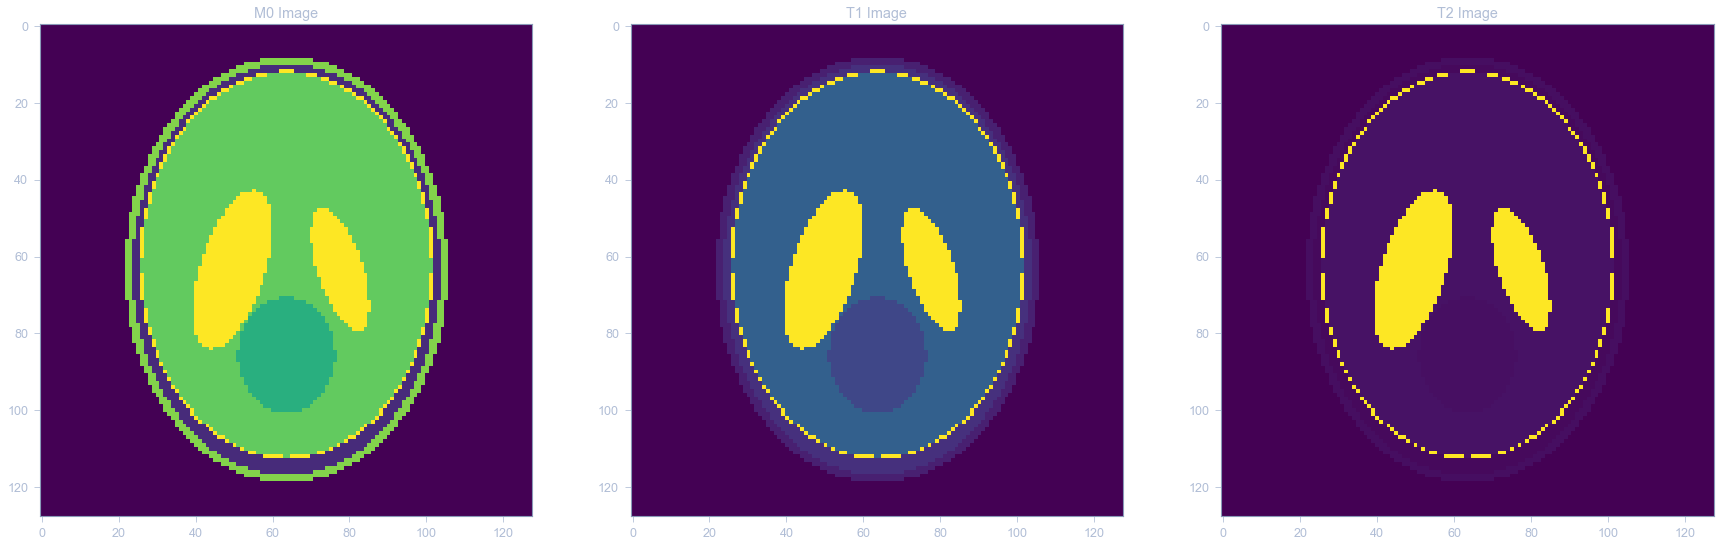

In [4]:
plt.figure(figsize=(30,10))

plt.subplot(131)
plt.imshow(np.abs(M0[:,:,6]))
plt.title('M0 Image')

plt.subplot(132)
plt.imshow(np.abs(T1[:,:,6]))
plt.title('T1 Image')

plt.subplot(133)
plt.imshow(np.abs(T2[:,:,6]))
plt.title('T2 Image')

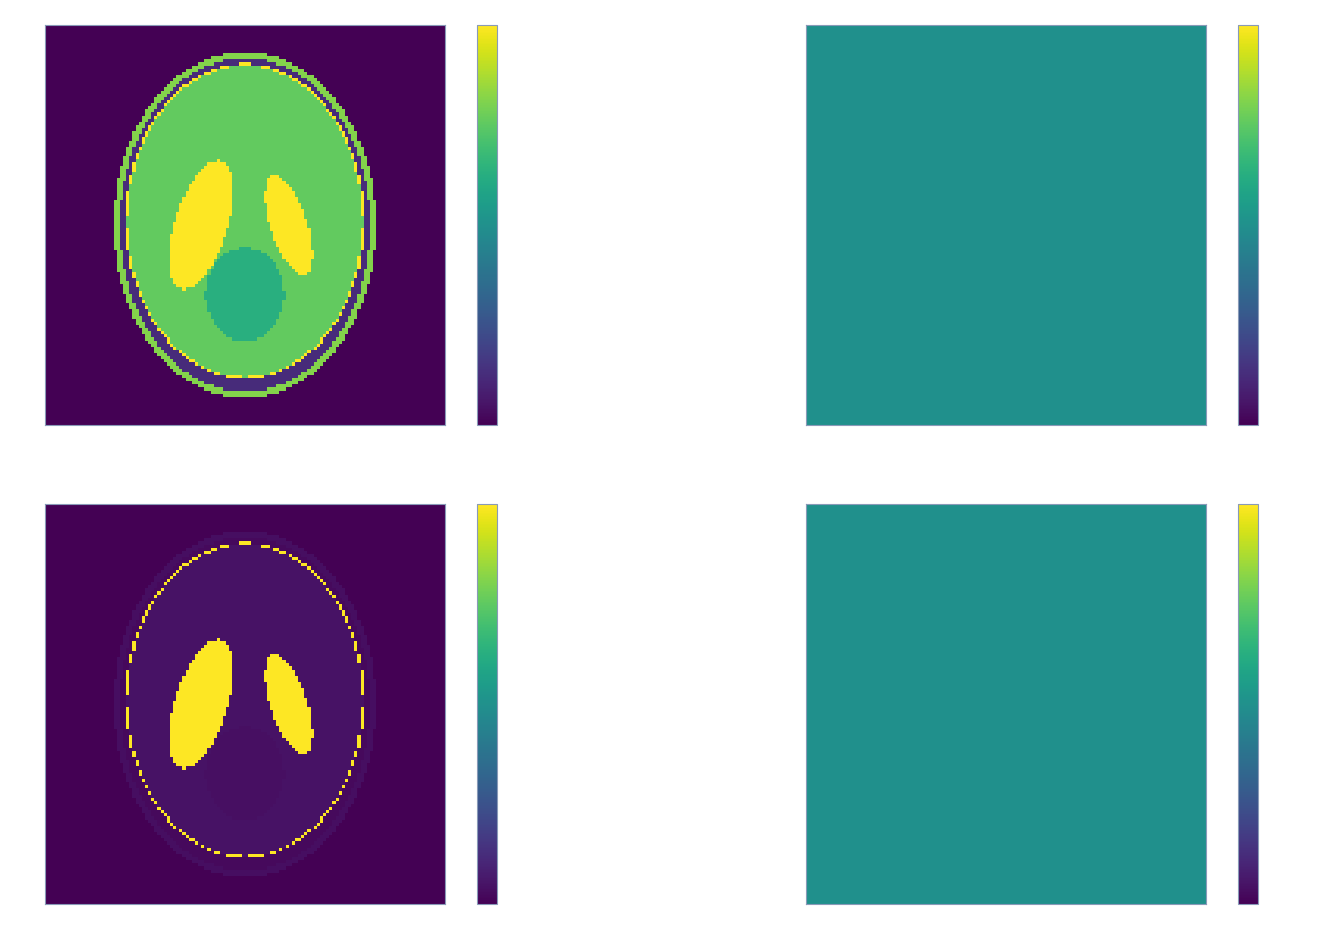

In [5]:
plots = {'Magnitude': np.abs(M0[:,:,6]),
         'Phase': np.angle(M0[:,:,6]),
        'Real': np.real(T2[:,:,6]),
        'Imaginary': np.imag(M0[:,:,6])
        }
i_plots(plots)

## Phantom

### Applying a Phase to a Real Image

In [6]:
nx = 128
[x,y,z] = np.meshgrid(range(0,nx),range(0,nx),range(0,20))
#phase = 2*np.pi*(3*np.exp(-np.sqrt(np.power((x-36),2)/16 + np.power((y-36),2)/16))) + 2*np.exp(-np.power((x-56),2)/(36**2))
#phase = 2*np.pi*(3*np.exp(-np.sqrt(np.power((x-36),2)+np.power((y-36),2)/16))+2*np.exp(-np.power((x-56),2)/36^2))
phase = np.sqrt(np.power((x-nx/4)/5,2) + np.power((y-nx/6)/10,2))
phase.shape

(128, 128, 20)

In [7]:
M1 = M0.copy()
M1_phased = M1 * np.exp(1j*phase)

### Selecting a Single Slice

In [8]:
M1_phased_6 = M1_phased[:,:,6]
mag = np.abs(M1_phased_6)
ang = np.angle(M1_phased_6)
real = np.real(M1_phased_6)
imaginary = np.imag(M1_phased_6)

## Obtaining low resolution
mag_lr = mag.copy()
mag_lr[mag_lr < 0.01] = 0
mag_mult_phase = ang*mag_lr

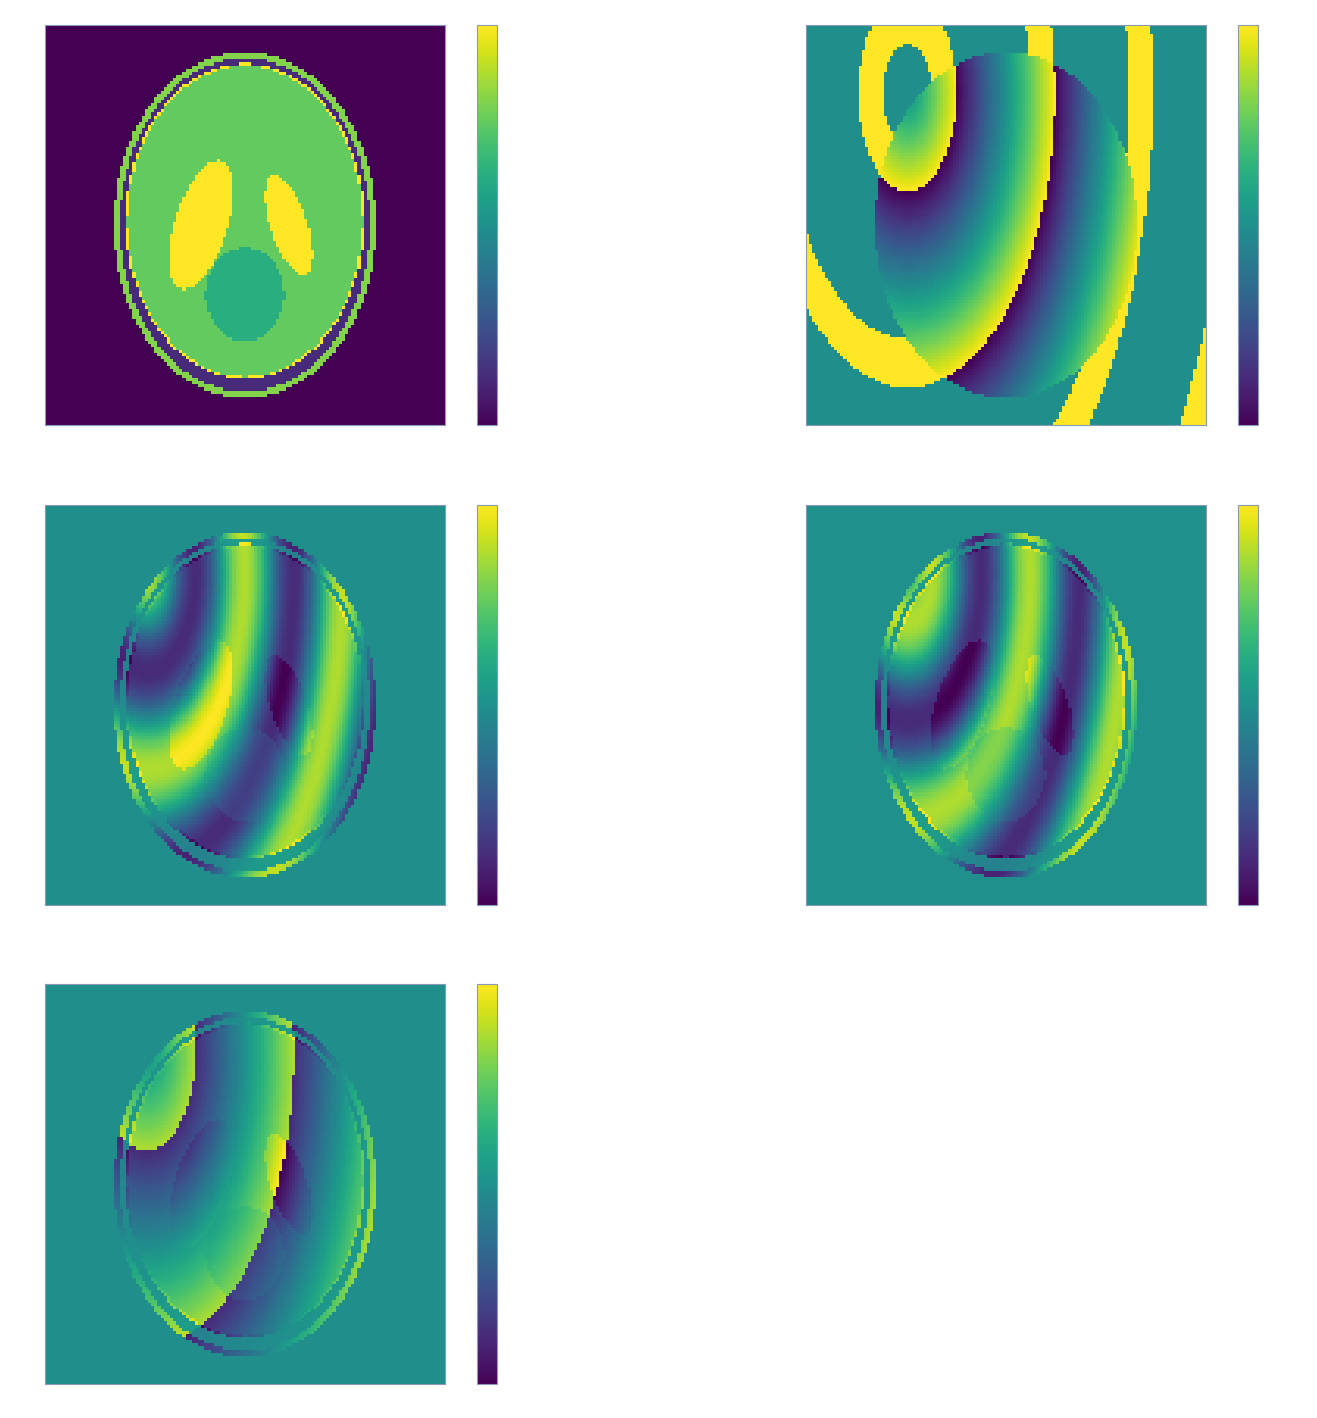

In [9]:
plots1 = {'Magnitude Phased':mag,
         'Phase Phased': ang,
        'Real Phased': real,
        'Imaginary Phased': imaginary,
        'Imaginary x Phased': mag_mult_phase
        }
i_plots(plots1)

## Sample Data and Generate a Low-Resolution Phase Estimate

In [17]:
def partial_fourier(k_sp,upper_or_lower,percentage):
    k_space = k_sp.copy()
    frac = percentage/100
    k_sp_frac = np.empty(k_sp.shape,dtype ='complex')
    start = 0
    end = 0
    
    if upper_or_lower == "up":
        start = 0
        end = int(frac*(int(k_space.shape[0])))
    
    elif upper_or_lower == "lower":
        start = k_space.shape[0]-int(frac*(int(k_space.shape[0])))
        end = k_space.shape[0]
    
    for i in range(start,end):
        k_sp_frac[i,:] = k_space[i,:]
        
    return k_sp_frac

### K-Space of Phased Image, M1_Phased

In [18]:
M1_ksp_single = np.fft.fftshift(np.fft.fft2((M1_phased_6.copy())))

Text(0.5, 1.0, 'K-Space of the 6th Slice')

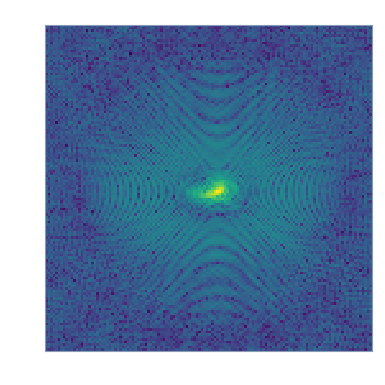

In [19]:
plt.figure(figsize=(6,6))
plt.imshow((np.log(1+np.abs(M1_ksp_single))))
plt.title('K-Space of the 6th Slice')

### 3 Quarters Partial Fourier Sampling

In [20]:
M1_ksp_3Q = partial_fourier(M1_ksp_single,'up',75)

Text(0.5, 1.0, '3Q of K-Space of the 6th Slice')

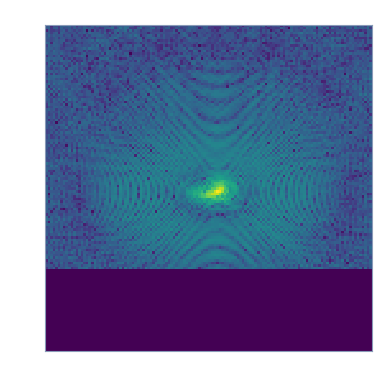

In [21]:
plt.figure(figsize=(6,6))
plt.imshow((np.log(1+np.abs(M1_ksp_3Q))))
plt.title('3Q of K-Space of the 6th Slice')

## Low resolution phase estimate from central k-space

Given only 3/4 of K-space data, the SYMMETRIC sampling of the centre of k-space can generate a low resolution phase estimate as seen in the Image: Phase x Magnitude

### Hanning Function

In [104]:
N_x = 128
N_y = 128
x = np.linspace(0,N_x,N_x)
y = np.linspace(0,N_y,N_y)
xv, yv = np.meshgrid(x, y)
w = 0.5*(1-np.cos(2*np.pi*(yv)/(N_y)))

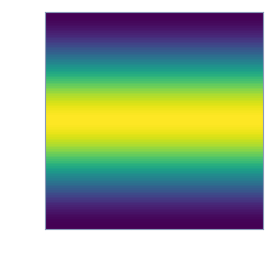

In [105]:
plt.imshow(w)

### Low Resolution Phase Estimate

In [106]:
# Low resolution phase estimate from symmetric central k-space
#noise = np.random.normal(0,0.1,M1_ksp_3Q.shape)
up = int(N_x/2-10)
low = int(N_x/2+10)
centre_PFksp = M1_ksp_3Q[up:low,:]
phs = np.zeros(M1_ksp_3Q.shape, dtype = 'complex')
phs[up:low,:] = centre_PFksp*w[up:low,:]
phs2 = np.exp(1j*np.angle((np.fft.ifft2(np.fft.ifftshift(phs)))))

54


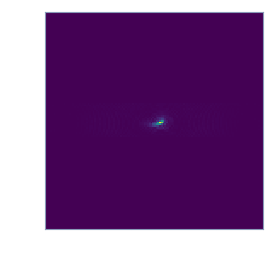

In [107]:
print(up)
plt.imshow(np.abs(phs))

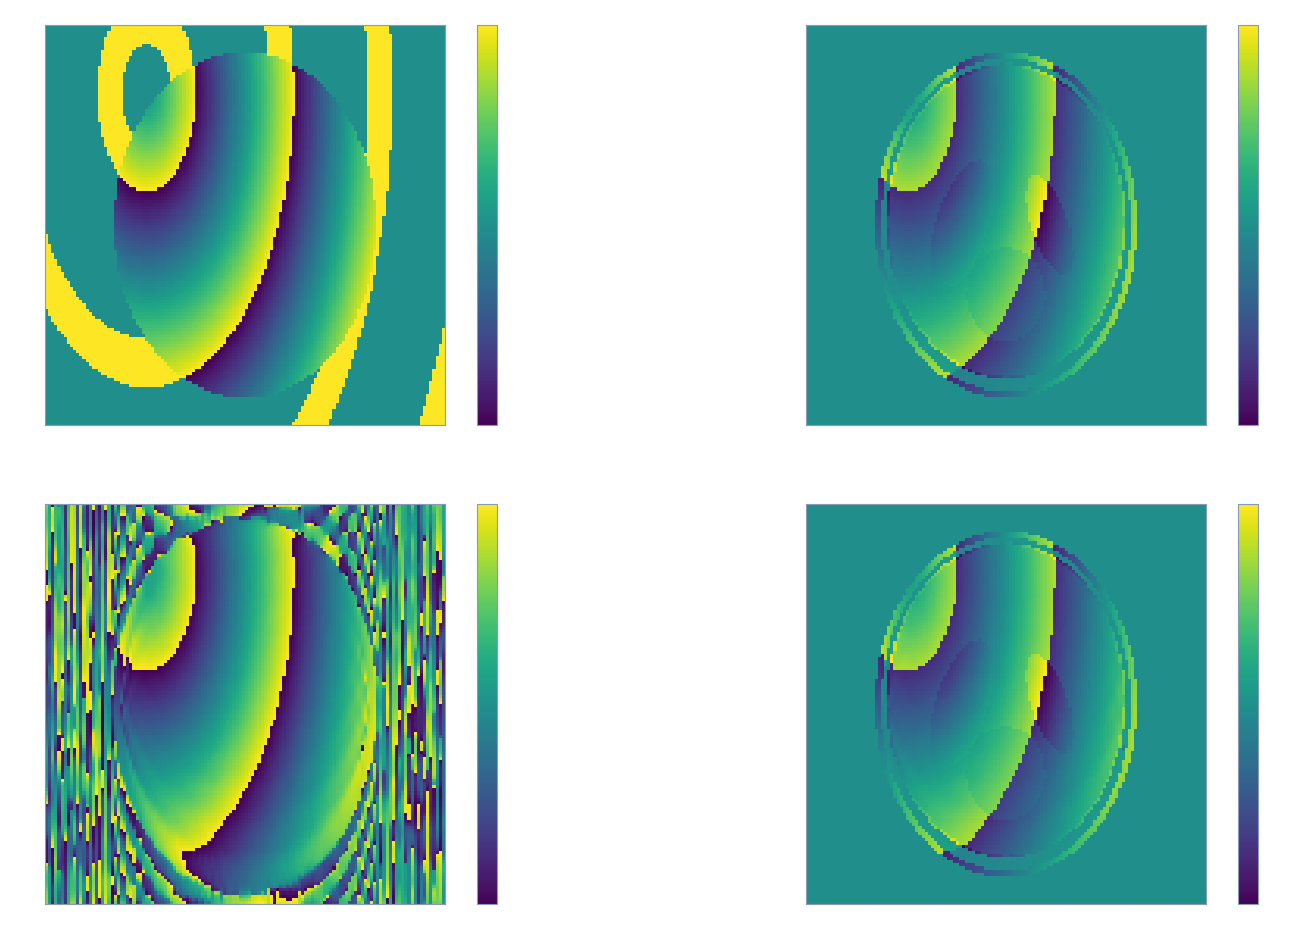

In [108]:
plots2 ={"Phase, Phased": ang,
         "Phase x Magnitude Image": mag_mult_phase,
         "Phase, Low Res Phase Estimate": np.angle(phs2),
         "Phase Low Res x Magnitude Image": np.angle(phs2)*mag_lr
                                                         }
i_plots(plots2)